In [5]:
import operator
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame,pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
sns.set(style="darkgrid")   
pandas.set_option('display.max_columns', None)

In [6]:
lf=pd.read_csv('C:\\python_programs\\U.S._Chronic_Disease_Indicators__CDI_.csv',low_memory=False)
df=lf[["YearStart","LocationDesc","Question","DataValue","DataValueUnit","Stratification1"]]
df=df.dropna()
# dropping duplicate values 
df.drop_duplicates(keep=False,inplace=True) 
df=df.reset_index(drop=True)
print (df)
print (df["YearStart"].value_counts())

        YearStart          LocationDesc  \
0            2016         United States   
1            2016               Alabama   
2            2016                Alaska   
3            2016               Arizona   
4            2016              Arkansas   
5            2016            California   
6            2016              Colorado   
7            2016           Connecticut   
8            2016              Delaware   
9            2016  District of Columbia   
10           2016               Florida   
11           2016               Georgia   
12           2016                Hawaii   
13           2016                 Idaho   
14           2016              Illinois   
15           2016               Indiana   
16           2016                  Iowa   
17           2016                Kansas   
18           2016              Kentucky   
19           2016             Louisiana   
20           2016                 Maine   
21           2016              Maryland   
22         

In [7]:
#dividing dataframe by coulmn value and reseting the index
df2 = df[df["YearStart"] == 2016]
df2=df2.reset_index(drop=True)
df3 = df[df["YearStart"] == 2015]
df3=df3.reset_index(drop=True)
df4 = df[df["YearStart"] == 2014]
df4=df4.reset_index(drop=True)
df5 = df[df["YearStart"] == 2013]
df5=df5.reset_index(drop=True)
df6 = df[df["YearStart"] == 2012]
df6=df6.reset_index(drop=True)
df7 = df[df["YearStart"] == 2011]
df7=df7.reset_index(drop=True)
df8 = df[df["YearStart"] == 2010]
df8=df8.reset_index(drop=True)
df9 = df[df["YearStart"] == 2009]
df9=df9.reset_index(drop=True)
df10 = df[df["YearStart"] == 2007]
df10=df10.reset_index(drop=True)
df11 = df[df["YearStart"] == 2001]
df11=df11.reset_index(drop=True)
dm=[df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]

In [8]:
# making a dataset of highest occuring subjects per year and the subjects affecting max no of people
dic={}
dic2={}
l2=[]
for x in dm:
    c=x["YearStart"][0]
    l=x['Question'].unique()
    ma=[]
    for y in l:
        sum=0
        for z in x["Question"]:
            if z==y:
                sum+=1
        dic2[y]=sum
    l2.append(max(dic2.items(), key=operator.itemgetter(1))[0])
    dic[c]=x['Question'].value_counts().idxmax()
da=pd.DataFrame({"Year":list(dic.keys()),"Most frequently occuring topic":list(dic.values()),"Topics affecting most people":l2})
print (da)

   Year                     Most frequently occuring topic  \
0  2016  Influenza vaccination among noninstitutionaliz...   
1  2015  Cholesterol screening among adults aged >= 18 ...   
2  2014  Influenza vaccination among noninstitutionaliz...   
3  2013  Influenza vaccination among noninstitutionaliz...   
4  2012            Arthritis among adults aged >= 18 years   
5  2011  Cholesterol screening among adults aged >= 18 ...   
6  2010  Hospitalization for chronic obstructive pulmon...   
7  2009               Prevalence of pre-pregnancy diabetes   
8  2007  Percent tobacco revenue to fund at CDC recomme...   
9  2001                    Life expectancy at age 65 years   

                        Topics affecting most people  
0  Influenza vaccination among noninstitutionaliz...  
1  Cholesterol screening among adults aged >= 18 ...  
2  Influenza vaccination among noninstitutionaliz...  
3  Influenza vaccination among noninstitutionaliz...  
4            Arthritis among adults aged >

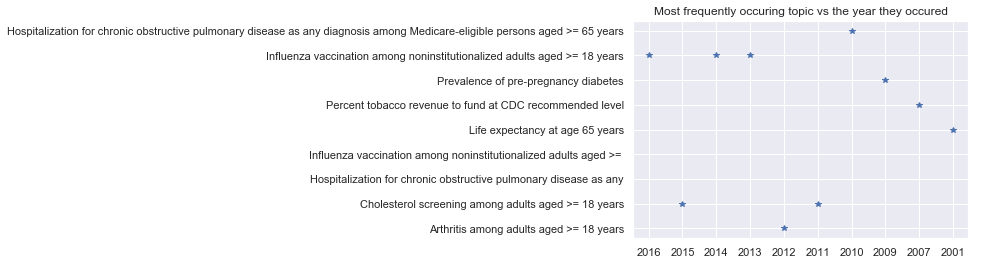

In [9]:
x = range(len(da))
xTicks = da['Year']
y =da['Most frequently occuring topic']
pl.xticks(x, xTicks)
pl.xticks(range(len(da)), xTicks) #writes strings with 90 degree angle
pl.plot(x,y,'*')
plt.title('Most frequently occuring topic vs the year they occured')
pl.show()

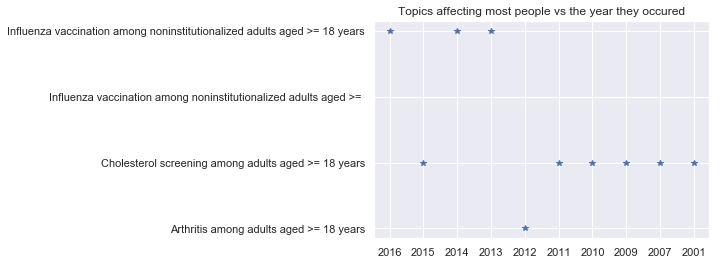

In [10]:
x = range(len(da))
xTicks = da['Year']
y =da['Topics affecting most people']
pl.xticks(x, xTicks)
pl.xticks(range(len(da)), xTicks) #writes strings with 90 degree angle
pl.plot(x,y,'*')
plt.title('Topics affecting most people vs the year they occured')
pl.show()

In [11]:
# finding the max value of each issue for entire U.S.A
data = df[df["LocationDesc"] == 'United States']
data=data.reset_index(drop=True)
l=df['Question'].unique()
dic3={}
l3=[]
l4=[]
for x in range (0,192):
    l3.append("")
    l4.append("")
c=0
for x in l:
    mx=0.0
    for y in range(0,len(data)):
        try:
            if (float(data['DataValue'][y])>mx) and (data['Question'][y]==x):
                mx=float(data['DataValue'][y])
                l3[c]=int(data['YearStart'][y])
                l4[c]=(data['DataValueUnit'][y])
        except:
            continue
    dic3[x]=mx
    c+=1
l5=[]
for x in range(0,len(dic3)):
    l5.append('United States')
data2=pd.DataFrame({"Location":l5,'Issue':list(dic3.keys()),"Max_value":list(dic3.values()),'Unit':l4,'Year':l3}) 
print (data2)  

          Location                                              Issue  \
0    United States  Binge drinking prevalence among adults aged >=...   
1    United States  Binge drinking intensity among adults aged >= ...   
2    United States       Heavy drinking among adults aged >= 18 years   
3    United States  Binge drinking prevalence among women aged 18-...   
4    United States  Binge drinking frequency among adults aged >= ...   
5    United States        Heavy drinking among women aged 18-44 years   
6    United States            Arthritis among adults aged >= 18 years   
7    United States  Arthritis among adults aged >= 18 years who ar...   
8    United States  Current asthma prevalence among adults aged >=...   
9    United States  Arthritis among adults aged >= 18 years who ha...   
10   United States  Arthritis among adults aged >= 18 years who ha...   
11   United States     Asthma prevalence among women aged 18-44 years   
12   United States  Physical inactivity among adult

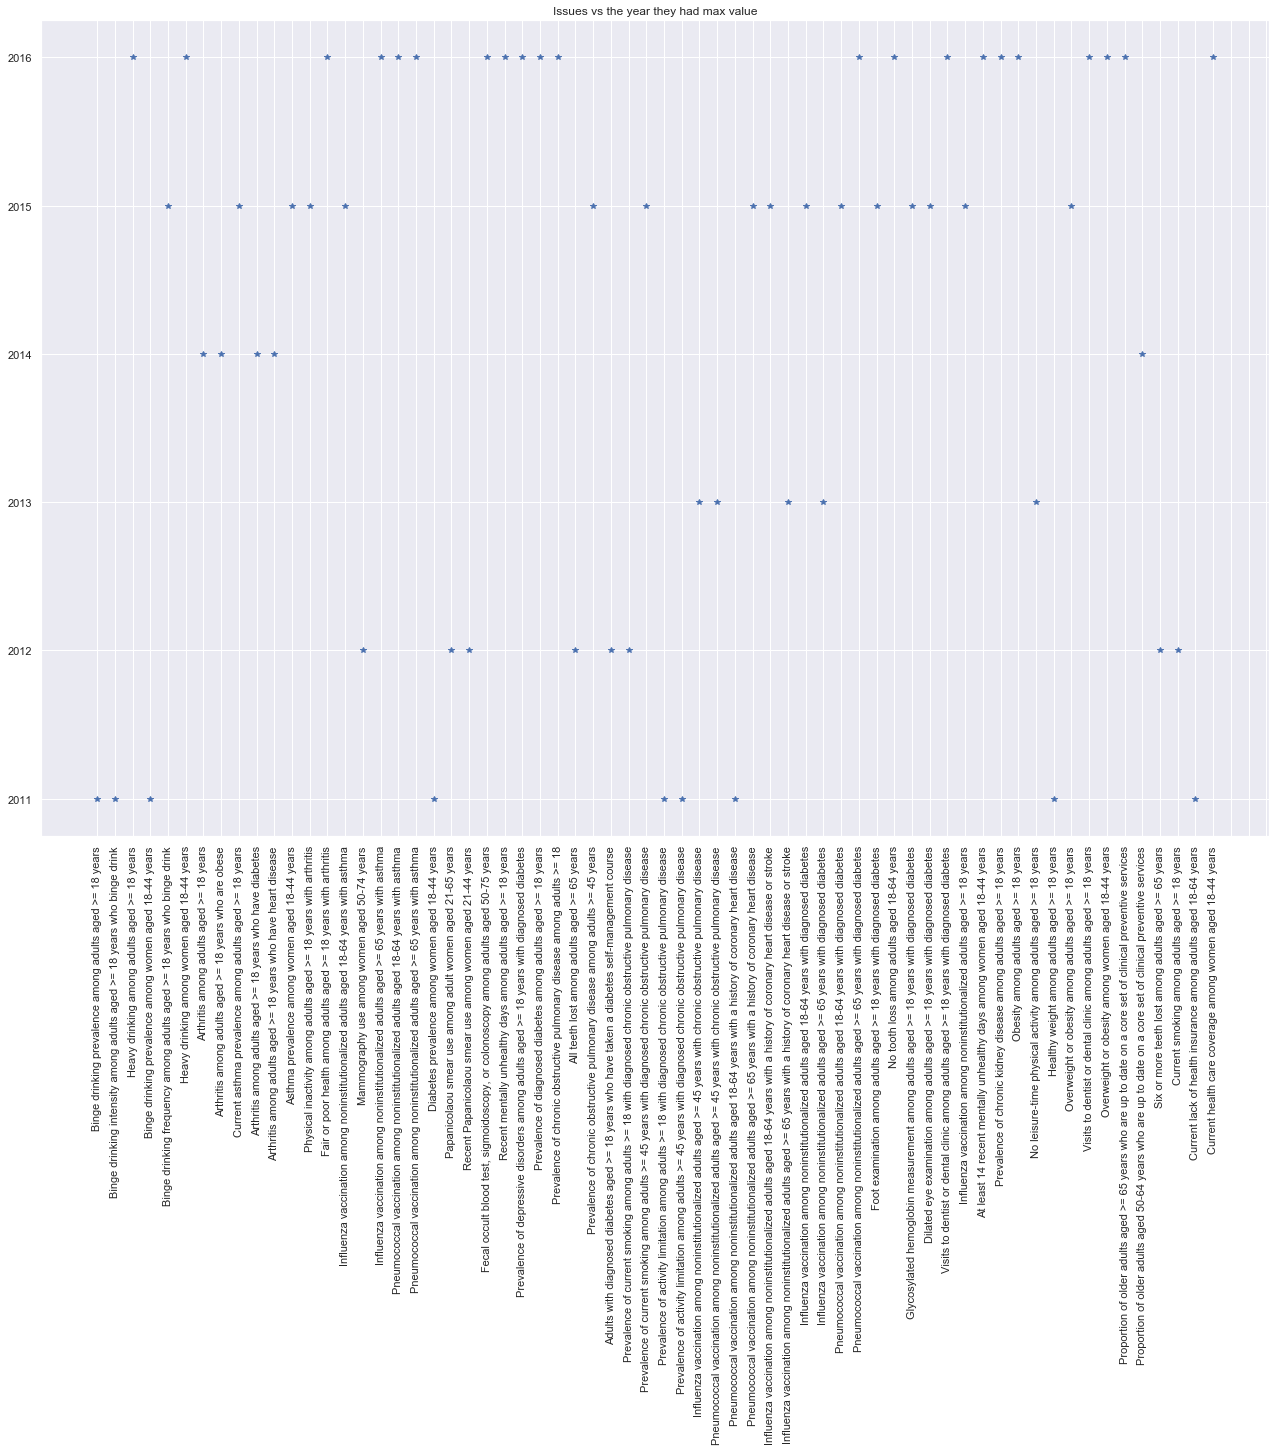

In [12]:
new_year = [x if x!='' else 'Not_defined' for x in data2['Year']]
plt.subplots(figsize=(22,15))
x = range(len(data2)//3)
xTicks = data2['Issue'][0:64]
y =new_year[0:64]
pl.xticks(x, xTicks)
pl.xticks(range(len(data2)), xTicks, rotation=90) #writes strings with 90 degree angle
pl.plot(x,y,'*')
plt.title('Issues vs the year they had max value')
pl.show()
# open in new page for better viewing 

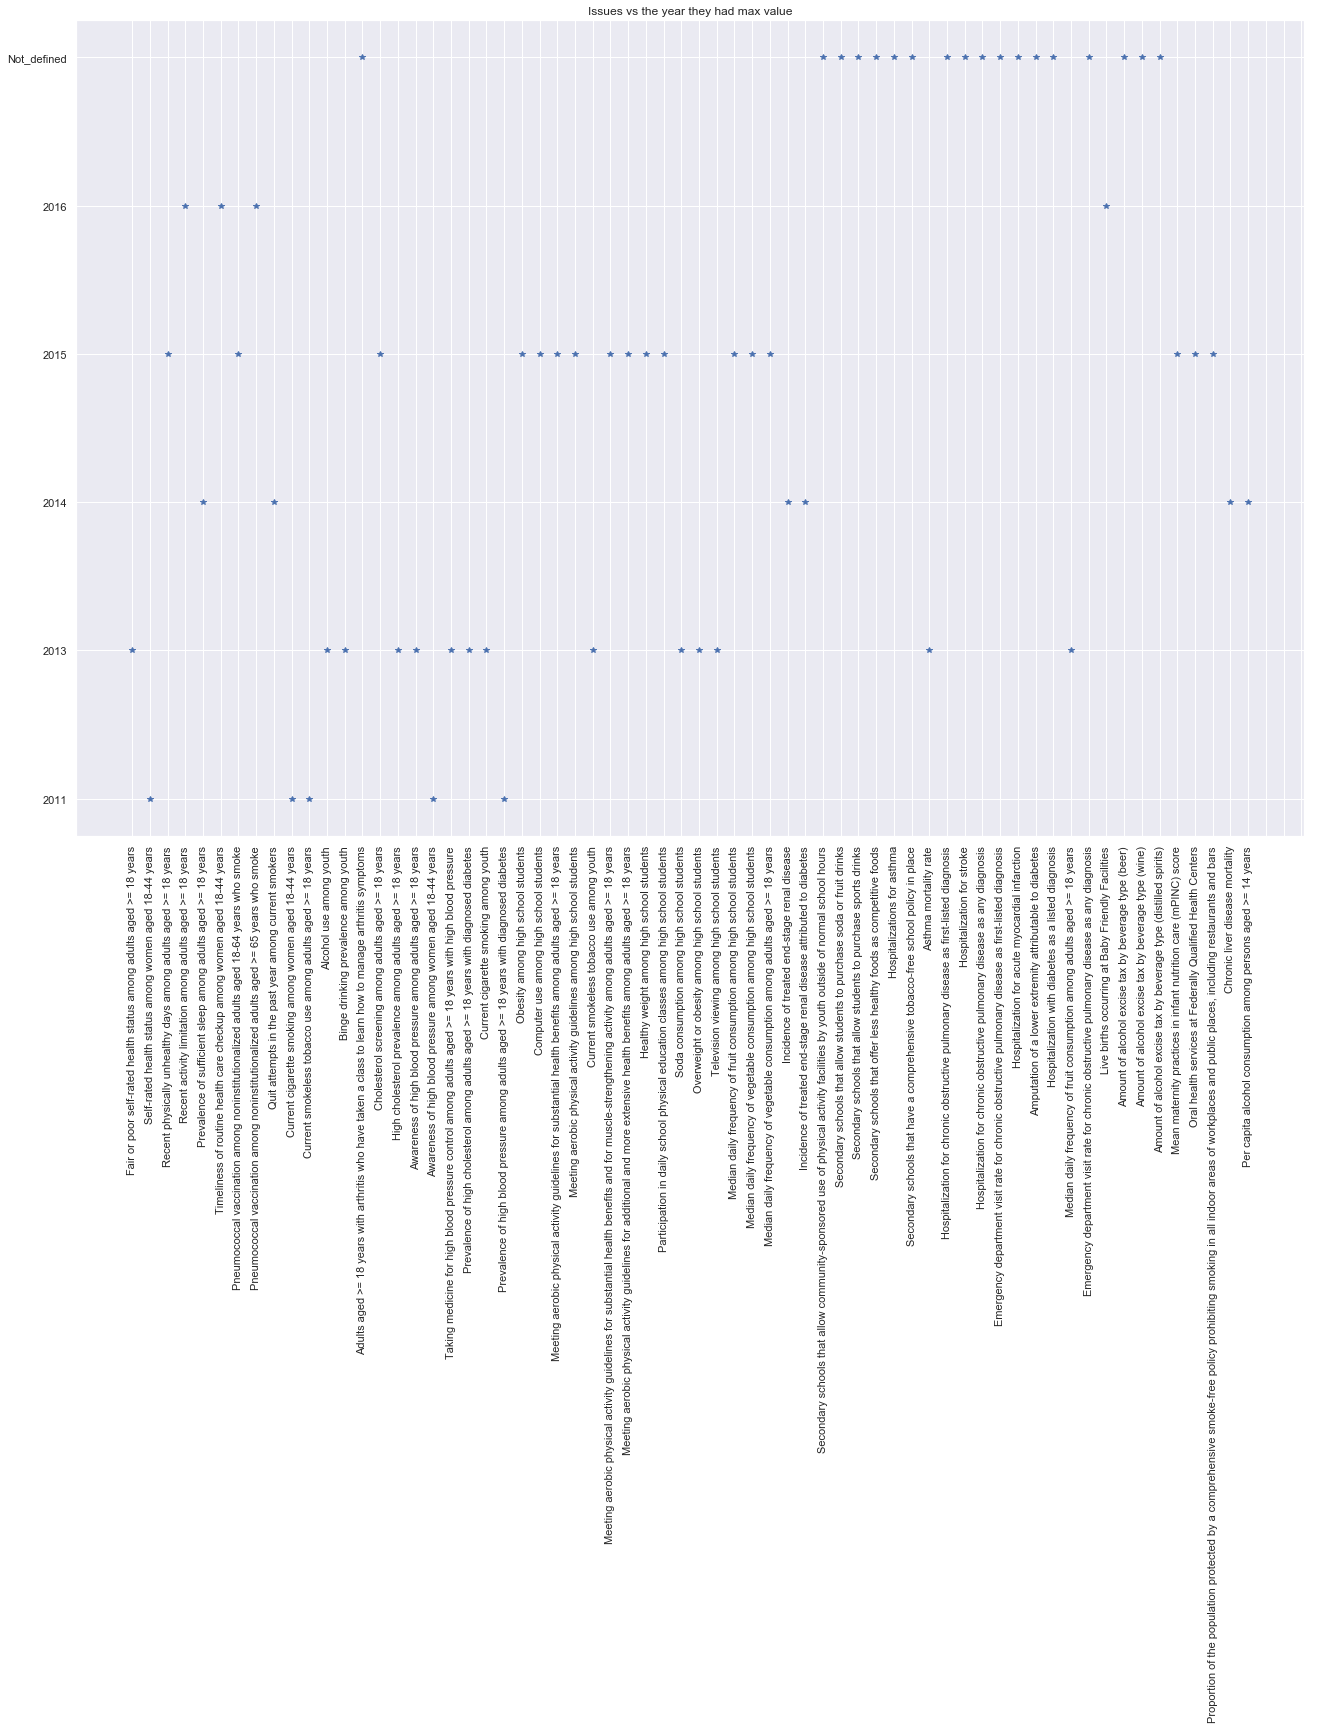

In [13]:
plt.subplots(figsize=(22,15))
x = range(len(data2)//3)
xTicks = data2['Issue'][64:128]
y =new_year[64:128]
pl.xticks(x, xTicks)
pl.xticks(range(len(data2)), xTicks, rotation=90) #writes strings with 90 degree angle
pl.plot(x,y,'*')
plt.title('Issues vs the year they had max value')
pl.show()
# open in new page for better viewing

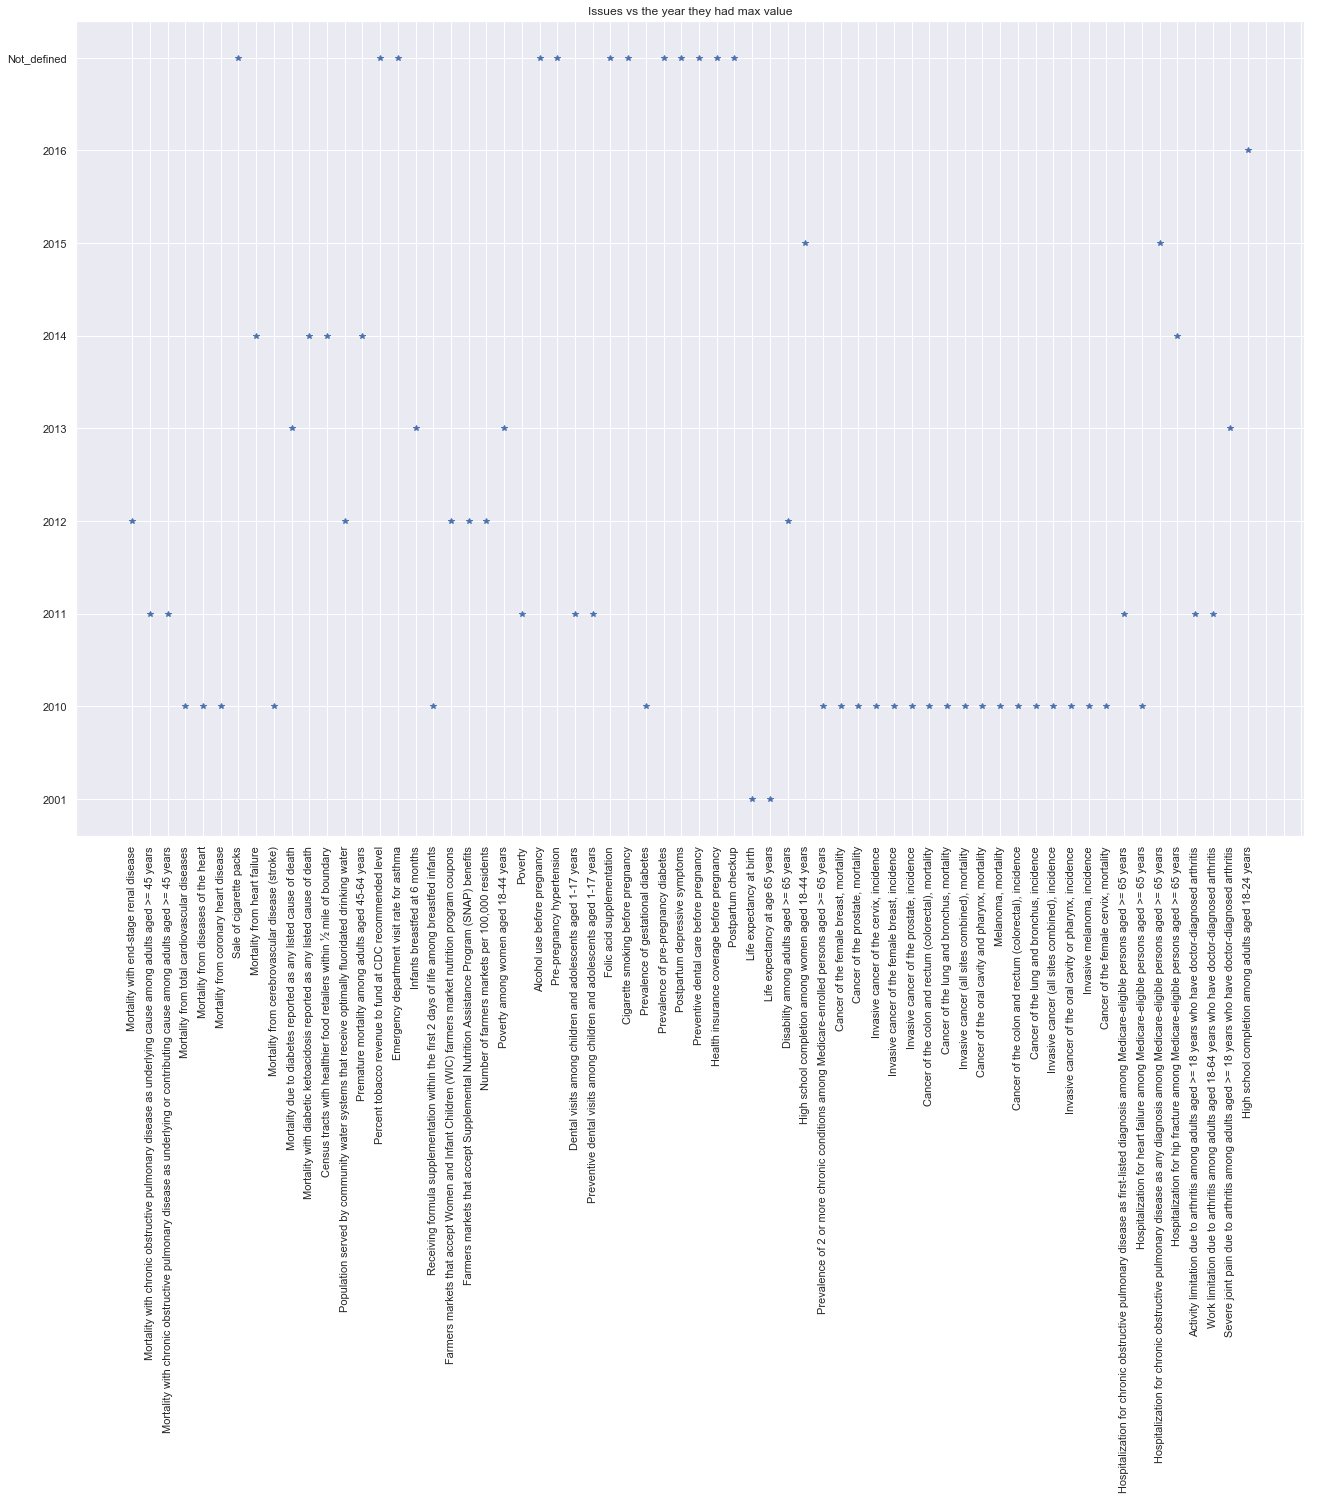

In [14]:
plt.subplots(figsize=(22,15))
x = range(len(data2)//3)
xTicks = data2['Issue'][128:]
y =new_year[128:]
pl.xticks(x, xTicks)
pl.xticks(range(len(data2)), xTicks, rotation=90) #writes strings with 90 degree angle
pl.plot(x,y,'*')
plt.title('Issues vs the year they had max value')
pl.show()
# open in new page for better viewing